# **Task - 02**
## Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

Sample Dataset :- https://www.kaggle.com/c/titanic/data

### Importing necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Titanic dataset:

In [2]:
df = pd.read_csv('train.csv')

### Displaying the first few rows to understand the structure of the data:

In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### Checking the summary statistics:

In [4]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


### Checking for missing values:

In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


## Data Cleaning

### Filling missing values for Age with the median age:

In [6]:
df['Age'].fillna(df['Age'].median(), inplace=True)

### Filling missing values for Embarked with the mode:

In [7]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

### Dropping Cabin column due to high number of missing values:

In [8]:
df.drop(columns=['Cabin'], inplace=True)

## Exploratory Data Analysis (EDA)

### Distribution of survivors vs non-survivors:

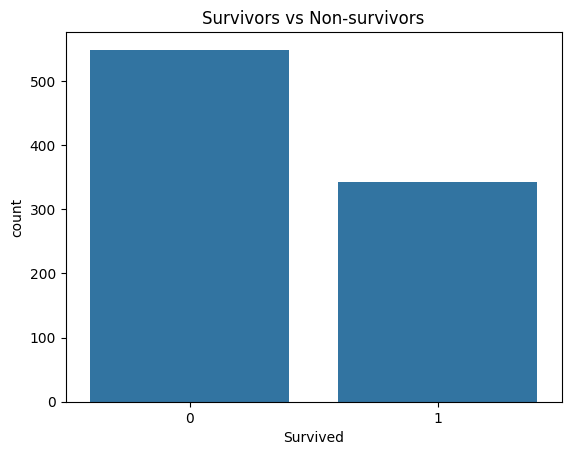

In [9]:
sns.countplot(x='Survived', data=df)
plt.title('Survivors vs Non-survivors')
plt.show()

### Survival rate by gender:

<ipython-input-10-c5c7028ba118>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=df, ci=None)


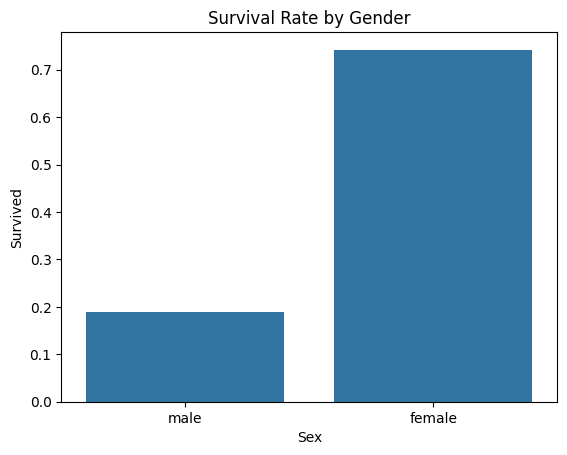

In [10]:
sns.barplot(x='Sex', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Gender')
plt.show()

### Survival rate by passenger class:

<ipython-input-11-5f4479a06588>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df, ci=None)


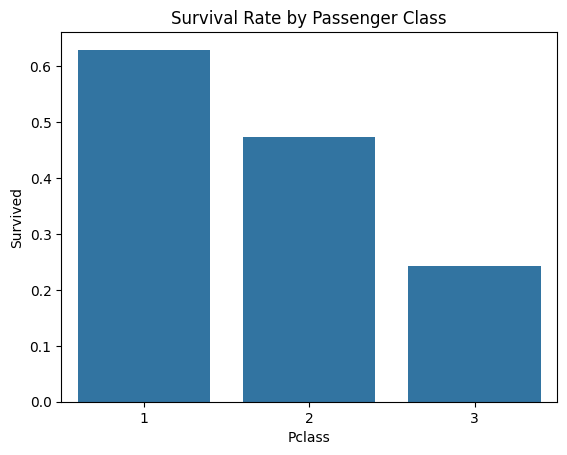

In [11]:
sns.barplot(x='Pclass', y='Survived', data=df, ci=None)
plt.title('Survival Rate by Passenger Class')
plt.show()

### Age distribution of passengers:

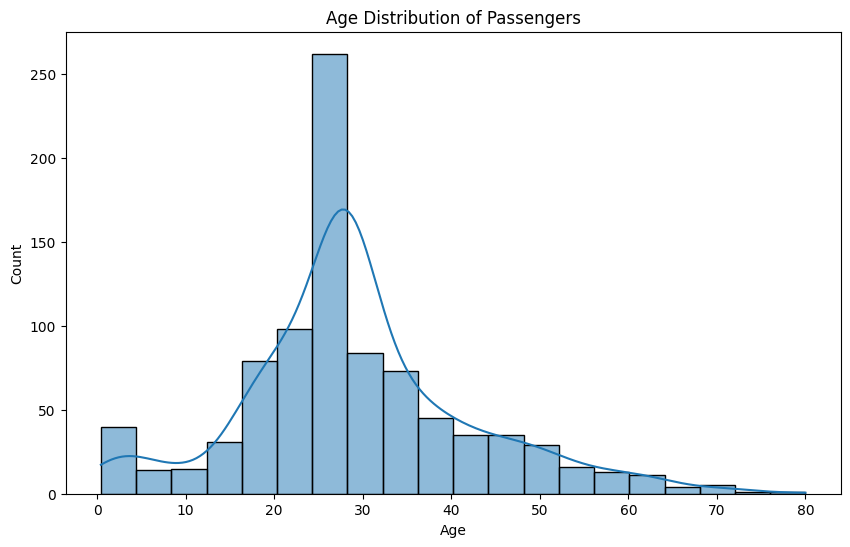

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Fare distribution by passenger class:

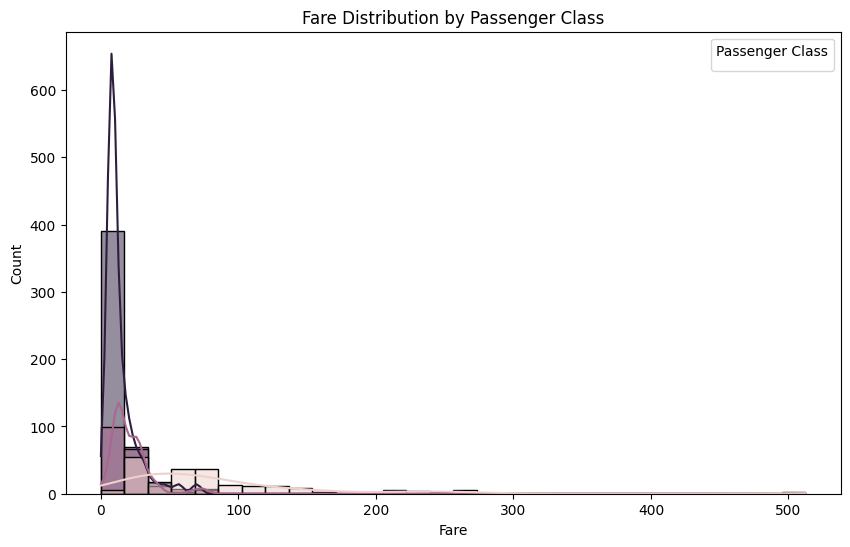

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(x='Fare', hue='Pclass', data=df, bins=30, kde=True)
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend(title='Passenger Class')
plt.show()

### Relationship between age, fare, and survival:

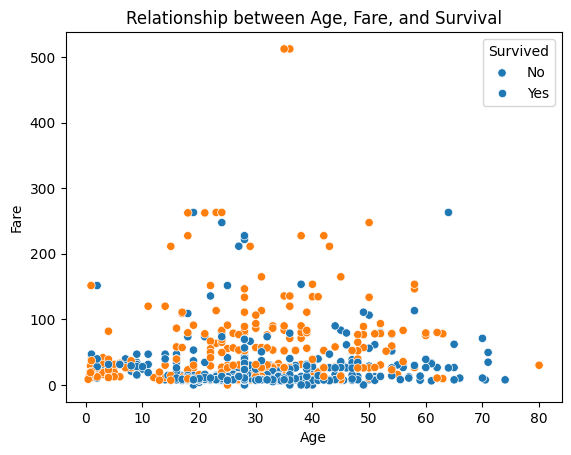

In [14]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title('Relationship between Age, Fare, and Survival')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()